In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("utf-8''iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

# Using K-Means algorithm

## Important-Standerize before using K-Means

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
ss=StandardScaler()
X=ss.fit_transform(X)
y=LabelEncoder().fit_transform(df.species)

y



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
X.shape,y.shape

((150, 4), (150,))

In [34]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

## Applying PCA (mainly for visualization purpose)

In [46]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2,random_state=23)

x_pca=pca.fit_transform(X)
print("Shape of reduced X:",x_pca.shape)

# append label to reduced dataset.
x_pca_label = np.concatenate((x_pca, y.reshape(X.shape[0], 1)), axis=1)
# print sample data in reduced dataset, last column is label
print(x_pca_label[:5,:])


Shape of reduced X: (150, 2)
[[-2.26470281  0.4800266   0.        ]
 [-2.08096115 -0.67413356  0.        ]
 [-2.36422905 -0.34190802  0.        ]
 [-2.29938422 -0.59739451  0.        ]
 [-2.38984217  0.64683538  0.        ]]


## K-Means

In [52]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,n_init=25,random_state=23)
km.fit(X)
y_cluster=km.predict(X)
y_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [53]:
#Count Cluster
from collections import Counter
cnt=Counter(y_cluster)
cnt

Counter({0: 50, 1: 47, 2: 53})

In [50]:
#Location of the clusters
cluster_centers=km.cluster_centers_
cc_pca=pca.transform(cluster_centers)
cc_pca

array([[-2.22475316,  0.28892745],
       [ 1.72103664,  0.60288719],
       [ 0.57262144, -0.80720888]])

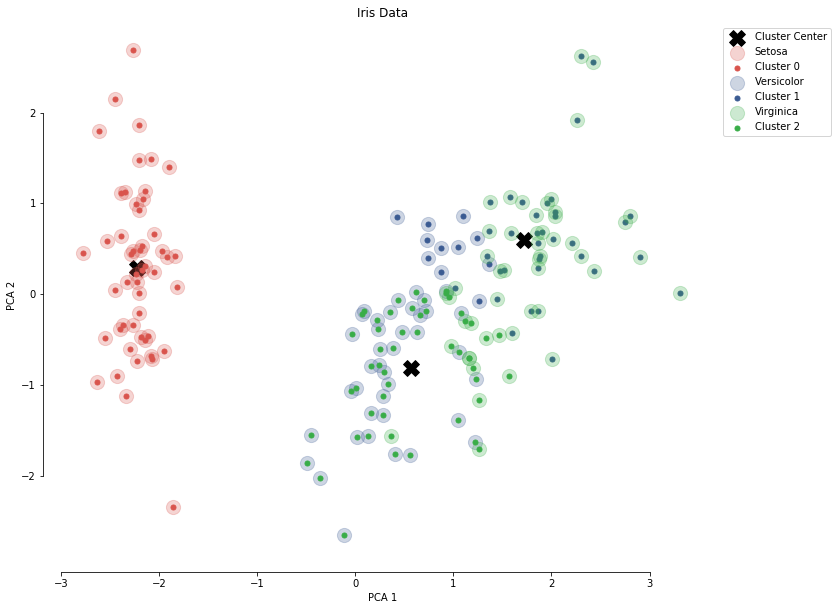

In [57]:
# Now we compare the cluster assignments to the real classes.

# Reduced features with true classes
cols = ['PCA1', 'PCA2', 'Species']
dt = pd.DataFrame(x_pca_label, columns = cols)

# Reduced Features with predicted clusters
pc = pd.DataFrame(np.concatenate((x_pca, y_cluster.reshape(X.shape[0], 1)), axis=1), columns = cols)

# Two sets of colors, can modify these to ensure colors match 
# between known and predicted clusters.
# colors for true classes
clr = [sns.xkcd_rgb['pale red'], 
       sns.xkcd_rgb['denim blue'], 
       sns.xkcd_rgb['medium green']]

# colors for predicted clusters
pclr = [sns.xkcd_rgb['pale red'], 
        sns.xkcd_rgb['denim blue'],
        sns.xkcd_rgb['medium green']]

# Label data
lbls = ['Setosa', 'Versicolor', 'Virginica']
plbls = ['Cluster 0', 'Cluster 1', 'Cluster 2']


# Predicted Clusters

# Now make the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot cluster centers
ax.scatter(cc_pca[:,0], cc_pca[:,1], 
           s=250, c='k', marker='X', 
           label='Cluster Center')

# Plot each species separately
for idx in range(3):
    
    # Plot species(real classes) as large points
    tmp_df = dt[dt['Species'] == idx]
    ax.scatter(tmp_df['PCA1'], tmp_df['PCA2'], 
               color=clr[idx], label=lbls[idx], alpha=0.25, s=200)

    # Plot assignd cluster as small point
    tmp_pdf = pc[pc['Species'] == idx]
    ax.scatter(tmp_pdf['PCA1'], tmp_pdf['PCA2'], 
               color=pclr[idx], label=plbls[idx], alpha=1, s=25)

# Decorate Plot
ax.set(title='Iris Data', xlabel='PCA 1', ylabel='PCA 2')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2)
sns.despine(offset=5, trim=True)

## Elbow Method for finding the optimal value of 'k'
(Copied from my Course,I only added some print function for better clarification)

In [65]:
# Search for best number of clusters, from one to ten
n_clusters = np.arange(1, 11)
print(n_clusters)

distances = np.zeros(n_clusters.shape[0])
print(distances)

# Perform k-means clustering for different numbers of clusters
# Use the inertia (or sum of total distances between points
# and cluster centers) as the performance metric.
for i, nc in enumerate(n_clusters):
    # We build our model for nc clusters
    model = KMeans(n_clusters=nc, n_init=10, random_state=23)
    model.fit(X)
    distances[i] = model.inertia_
    print(distances[i])

[ 1  2  3  4  5  6  7  8  9 10]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
600.0
222.361704965023
139.82049635974977
114.30480331856755
90.92720535557231
80.86016968231061
72.18507884619302
62.213746857857544
54.32869096906293
49.34665786472104


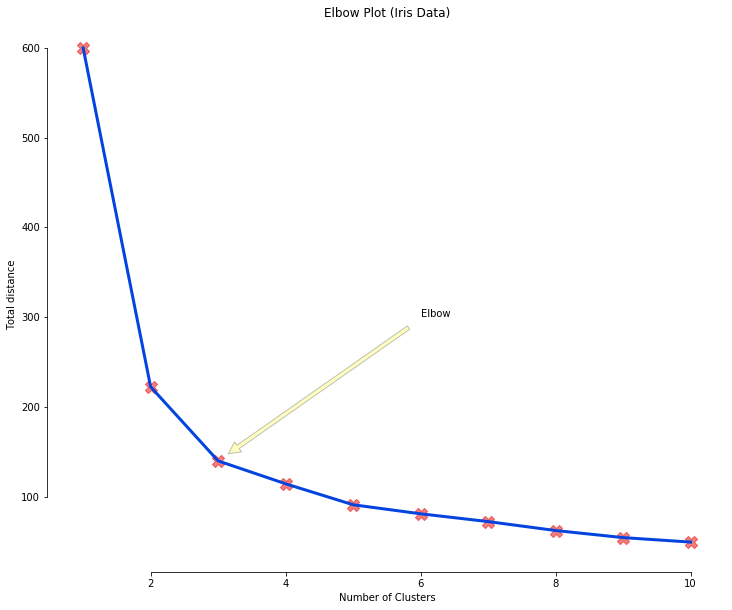

In [68]:
# Plot elbow method
fig, ax = plt.subplots(figsize=(12, 10))

# Draw points and connect them
ax.scatter(n_clusters, distances, s=150,c=sns.xkcd_rgb['red'], marker='X', alpha=0.5)

ax.plot(n_clusters, distances, lw=3, linestyle='-',color=sns.xkcd_rgb['blue'])

# Define elbow at three clusters
elb = (n_clusters[2], distances[2])

# Draw an arrow showing the elbow
ax.annotate('Elbow',xytext=[6, 300],xy=elb,arrowprops=dict(facecolor=sns.xkcd_rgb['yellow'],alpha=0.25, shrink=0.05))

# Decorate Plot
ax.set(title='Elbow Plot (Iris Data)',xlabel='Number of Clusters',ylabel='Total distance')
sns.despine(offset=5, trim=True)

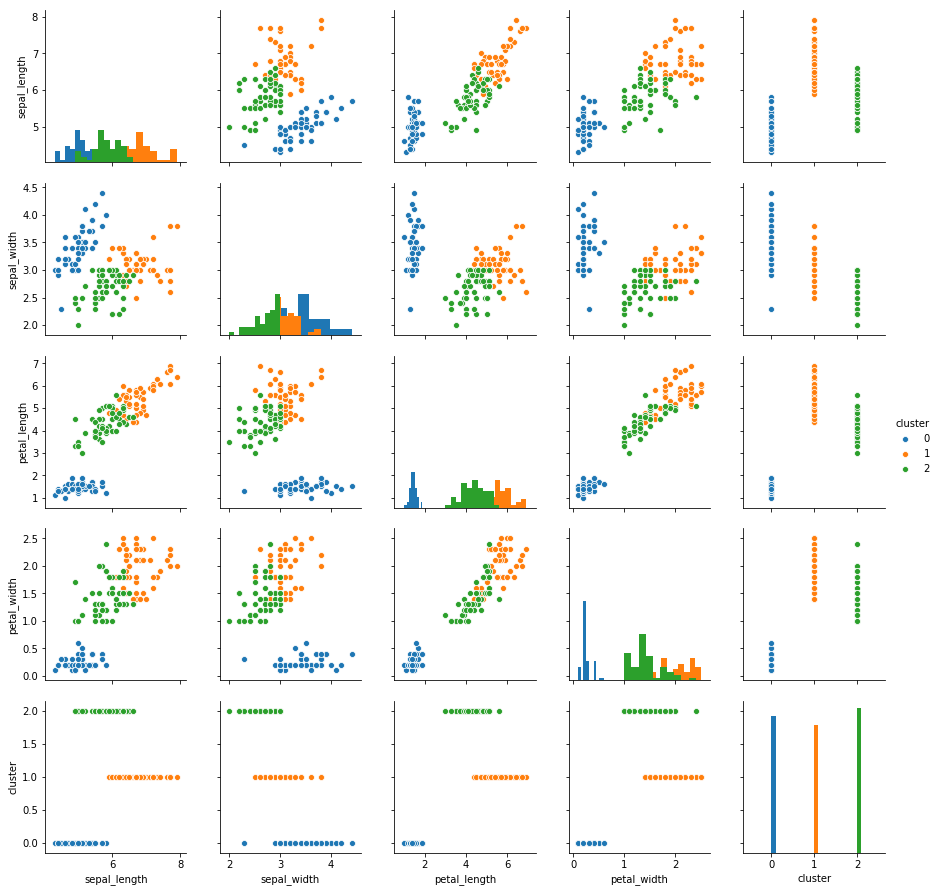

In [71]:
#create a new column in the df that will hold our preidected.
df['cluster'] = y_cluster

grid = sns.pairplot( df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster']], hue="cluster", diag_kind='hist')

## Adjusted Rand Index and Silhouette 

In [77]:
from sklearn import metrics
ars=metrics.adjusted_rand_score(y,y_cluster)
ss=metrics.silhouette_score(X,y_cluster)
#The silhouette score is high if we use x_pca ,its around 0.512
print("Adjusted Rand Index score:",ars)
print("Silhouette Score:",ss)

Adjusted Rand Index score: 0.6201351808870379
Silhouette Score: 0.4599482392007267
